In [1]:
import numpy as np
from matplotlib import pyplot as plt

# 1. Regression avec SKLearn

In [27]:
np.random.seed(0)
m = 100
X = np.linspace(0,10,m).reshape(m,1)
y = X**2 + np.random.randn(m,1)

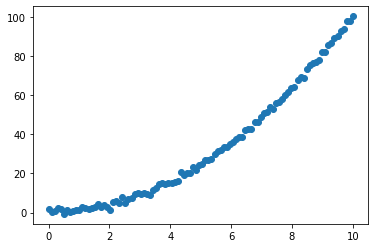

In [28]:
plt.scatter(X,y)

In [29]:
from sklearn.linear_model import LinearRegression

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


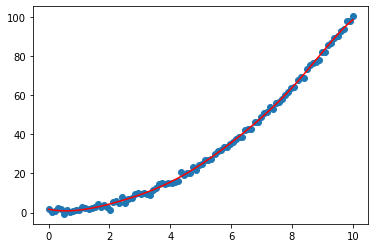

In [32]:
model = SVR(C=100)
model.fit(X, y)
model.score(X, y)

predictions = model.predict(X)

plt.scatter(X, y)
plt.plot(X, predictions, c='r')

In [19]:
from sklearn.svm import SVR

# 2. Classification: Survivants du Titanic

In [33]:
import pandas as pd
import seaborn as sns

In [34]:
titanic = sns.load_dataset('titanic')

In [35]:
titanic.shape

(891, 15)

In [36]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [38]:
titanic = titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis=0, inplace=True)

In [40]:
titanic['sex'].replace(['male', 'female'], [0, 1], inplace=True)

In [41]:
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
model = KNeighborsClassifier(n_neighbors=5)

In [44]:
y = titanic['survived']

In [45]:
X = titanic.drop('survived', axis=1)

In [46]:
y 

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: survived, Length: 714, dtype: int64

In [47]:
X

,pclass,sex,age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0
...,...,...,...
885,3,1,39.0
886,2,0,27.0
887,1,1,19.0
889,1,0,26.0


In [59]:
model.fit(X, y)
model.score(X, y)

0.8319327731092437

In [53]:
def survie(model, pclass, sex, age):
    x = np.array([pclass, sex, age]).reshape(1,3)
    print(model.predict(x))
    print(model.predict_proba(x))

In [64]:
survie(model, 1, 1, 22)

[1]
[[0.44827586 0.55172414]]


2


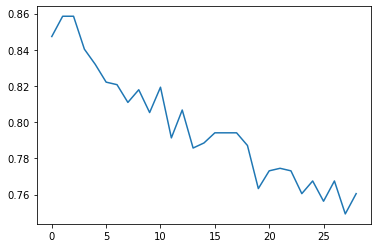

In [62]:
score = []
best_k = 1
best_score = 0

for k in range(best_k, 30):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X,y)
    score.append(model.score(X,y))
    
    if best_score < model.score(X, y):
        best_k = k
        best_score = model.score(X, y)
        
print(best_k)
plt.plot(score)

In [63]:
#MAUVAISE APPROCHE !

In [ ]:
# 1. Creer un Train set et un Test set. Entrainer puis evaluer
# 2. Avec GridSearch, trouver les meilleurs hyper-parametres n_neighbors, metrics et weights
# 3. Est-ce que collecter plus de donnees serait utile ?